### Import packages

In [1]:
import sys
sys.path.append('../')
import numpy as np
from gmm import GMM
from gmm_mi import GMM_MI
from utils.synthetic_data import D3p as dataset
from utils.plotting import plot_gmm_contours, histogram_estimates, plot_loss_curves

### Calculate the true MI of the synthetic model, and plot contours

0.38892998866932643


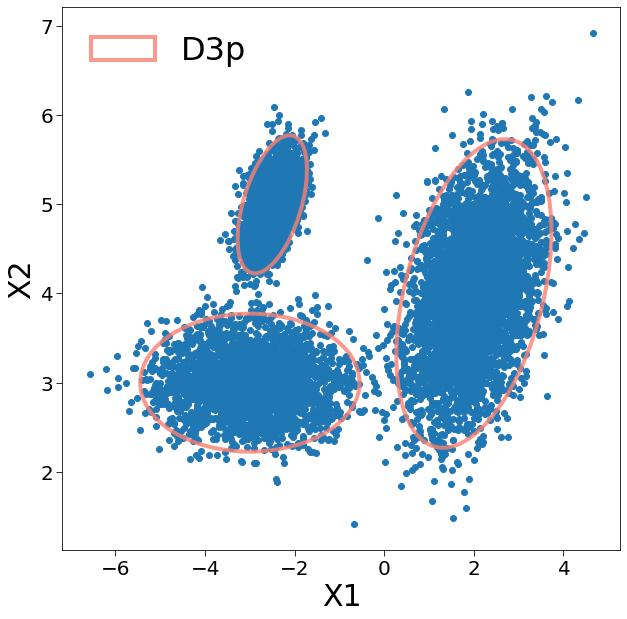

In [2]:
label = 'D3p'
# it will be probably wise to store these analytic values and simply load them
analytic = 0.38892998866932643#dataset.estimate_MI_MC(MC_samples=1e8)
print(analytic)
plot_gmm_contours(dataset, ls='-', label=label)

### Test on 500 trials

In [3]:
N = 10000
random_states = 500

# probably make a yaml file for these parameters
# parameters to play with
n_inits = 10
n_folds = 5
init_type = 'random_sklearn'
MC_samples = 1e5
tol = 1e-6
reg_covar = 1e-15
max_iter = 10000
MC_samples = 1e5
bootstrap = False
fixed_components = True
n_bootstrap = 100
select_c = 'valid'
patience = 1
verbose = False
all_MI_estimates = np.zeros((random_states))

n_components = dataset.n_components 
true_weights = dataset.weights_
true_means = dataset.means_
true_covariances = dataset.covariances_

for r in range(random_states):
    
    X = GMM(n_components=n_components, weights_init=true_weights, 
                      means_init=true_means, covariances_init=true_covariances, 
                      random_state=r).sample(N)[0]

    MI_mean, _, lc = GMM_MI(X, n_folds=n_folds, n_inits=n_inits, 
                            init_type=init_type, reg_covar=reg_covar, tol=tol, max_iter=max_iter,
                            bootstrap=bootstrap, n_bootstrap=n_bootstrap, MC_samples=MC_samples, 
                            fixed_components=fixed_components, fixed_components_number=n_components, 
                            select_c=select_c, patience=patience, verbose=verbose)
    

    # print for debugging purposes
    print(r, MI_mean) 

    all_MI_estimates[r] = MI_mean

    # save, if needed
    #np.save('./D3p_bias_MI_test.npy', all_MI_estimates)

0 0.40650125063077175
1 0.3861457106698005
2 0.4060514892392266
3 0.3868341534935538
4 0.3853140576634863
5 0.3837393947179205
6 0.39663238171446913
7 0.3972974545198396
8 0.39205631149572967
9 0.39157891597733263
10 0.40183815573569925
11 0.3936393642812979
12 0.3987536106241153
13 0.387209385059313
14 0.3990235877772434
15 0.38765743887482995
16 0.3970884258125976
17 0.3892533058018203
18 0.389981613201129
19 0.39490705182434677
20 0.38977267452548914
21 0.3938219524190318
22 0.39002891731973427
23 0.3881935725297319
24 0.3869492874148219
25 0.40095941494017423
26 0.3954236469247533
27 0.39258320168594296
28 0.3952722690751085
29 0.3933731678526516
30 0.40226058636451467
31 0.39104112891158876
32 0.37996479511011744
33 0.3971755551333325
34 0.38688830553934245
35 0.3881560345668842
36 0.39658824927480557
37 0.3913690093232789
38 0.391208407545413
39 0.3856649287914851
40 0.38636015942229424
41 0.3948068553257662
42 0.39693370350558493
43 0.37621155301991427
44 0.38561927712088434
45 

355 0.38303804099143346
356 0.3868448441769232
357 0.39341761718758467
358 0.38313705336264114
359 0.38872031933799933
360 0.39443944366642153
361 0.39459742513693963
362 0.3865210644733491
363 0.3894511731877186
364 0.38293034516762686
365 0.38986662519449483
366 0.39410858533049126
367 0.39498205488191995
368 0.38697960897976896
369 0.39596239082666645
370 0.38308112966284685
371 0.3909063225236094
372 0.39938082726587476
373 0.37627030315329285
374 0.39322727687083003
375 0.38606563656661075
376 0.3893438547139702
377 0.3919492900741537
378 0.3895265212188979
379 0.3919227259299435
380 0.39051561151857683
381 0.3910497182215692
382 0.38591308837841876
383 0.3922702854536852
384 0.40123431868568865
385 0.3959514643974461
386 0.39266694264799196
387 0.4010567484218342
388 0.39322407095413625
389 0.38218933346769474
390 0.3866548775615665
391 0.40196138455677066
392 0.37999177901608405
393 0.39205436842817915
394 0.3916881949470877
395 0.3872004682562653
396 0.39244479126761156
397 0.3

### Evaluate MI bias

In [7]:
# load in case you saved it
#all_MI_estimates = np.load('./D3p_bias_MI_test.npy')

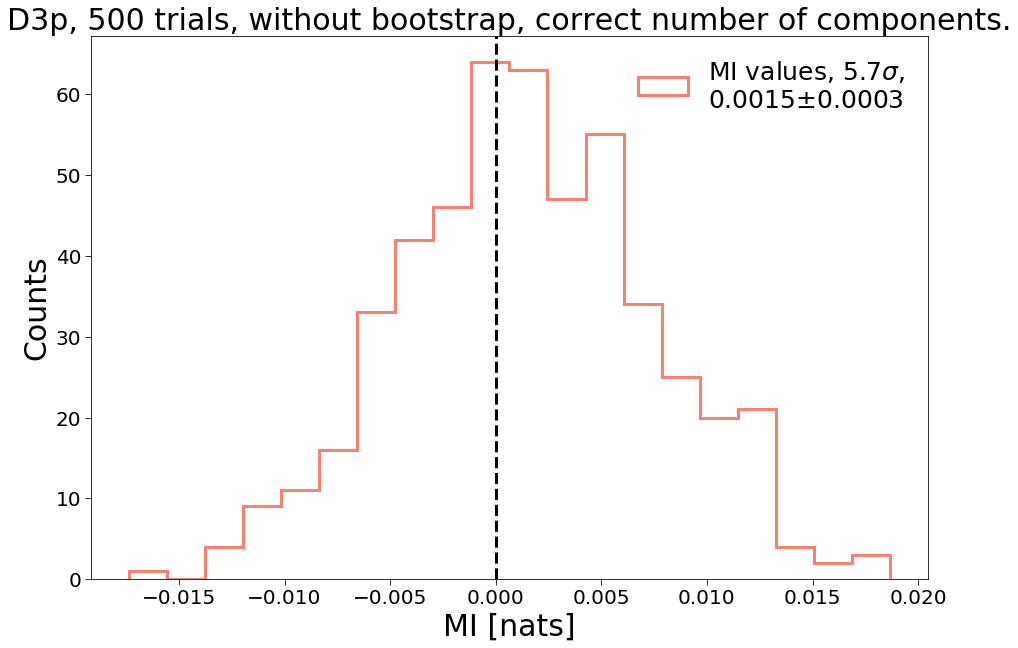

In [6]:
histogram_estimates(all_MI_estimates - analytic, title=f'{label}, {random_states} trials, without bootstrap, correct number of components.')